## Bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Funções

In [ ]:
def calc_Zp(eta, t, phi, d, rho_0, omega, Z_0, D, c_0):
  omega = omega*2*np.pi
  k_0 =(omega)/c_0
  s_raw =d*np.sqrt((rho_0*omega)/(4*eta))
  s = np.array([max(1, min(10, x)) for x in s_raw])
  ep = 1.1284*np.sqrt(phi)
  F_ep = (1-(1.4092*ep)+(0.33818*(ep**3))+(0.06793*(ep**5))-(0.02287*(ep**6))+(0.03015*(ep**7))-(0.01641*(ep**8)))**(-1)
  Zp = 0
  Zp += (((32*eta*t)/(phi*(d**2)))*np.sqrt(1+((s**2)/32))) +1j*0
  Zp += ((1j*omega*rho_0*t)/phi)*(1+((np.sqrt(9+((s**2)/2)))**(-1)))
  Zp += (np.sqrt(2)*eta*s)/(phi*d)
  Zp += (1j*0.85*omega*rho_0*d)/(phi*F_ep)
  Zp += -1j*Z_0*(1/np.tan(k_0*D))
  return Zp

## Parte (a) - Modelo Maa/3 Casos

In [ ]:
## Propriedades do Painel
t = 0.35e-3 #Espessura do Painel
## Propriedades da Cavidade
D = 1.75e-2 ##Espessura da Cavidade
## Propriedades do Fluido
eta = 1.84e-5 #Viscosidade Dinãmica do ar
rho_0 = 1.21 #Densidade do Fluido
c_0 = 343.6 #Velocidade do Som
Z_0 = rho_0*c_0 #Impedância do ar

In [ ]:
omega = np.arange(100,10000,1)
## Definindo os Parâmetros Variaveis
all_d = [0.6e-3, 0.25e-3, 0.15e-3]
all_phi = [0.007, 0.003, 0.15]
all_alpha = []
for d, phi in zip(all_d, all_phi):
  Zp_var = calc_Zp(
      eta=eta,
      t=t,
      phi=phi,
      d=d,
      rho_0=rho_0,
      omega=omega,
      Z_0=Z_0,
      D=D,
      c_0=c_0
  )
  alpha_var = 1-(np.abs((Zp_var-Z_0)/(Zp_var+Z_0))**2)
  all_alpha.append(alpha_var)

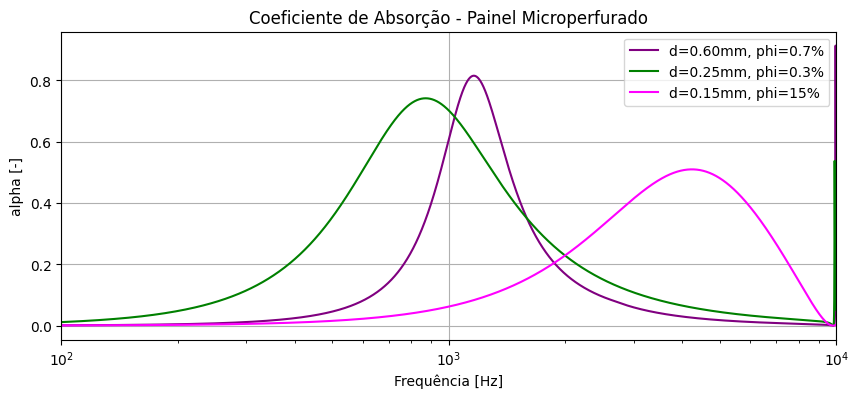

In [ ]:
colors = ['purple', 'green', 'magenta']
labels = ['d=0.60mm, phi=0.7%', 'd=0.25mm, phi=0.3%', 'd=0.15mm, phi=15%']
## Plot da Velocidade de Propagação - Parte Real e Imaginária
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
# Gráfico da parte real
for i, alpha in enumerate(all_alpha):
  ax.semilogx(omega, alpha, label=labels[i], color=colors[i])
ax.set_title('Coeficiente de Absorção - Painel Microperfurado')
ax.set_xlabel('Frequência [Hz]')
ax.set_ylabel('alpha [-]')
ax.set_xlim([100,10000])
# ax1.set_ylim([1,1.5])
ax.grid(True)
ax.legend()

## Parte (b) - Modelo Maa / 1º Caso: Variando Diâmetro do Furo

In [ ]:
## Propriedades do Painel
t = 1.5e-3 #Espessura do Painel
phi = 0.02 #Porosidade do Painel
## Propriedades da Cavidade
D = 3e-2 ##Espessura da Cavidade
## Propriedades do Fluido
eta = 1.84e-5 #Viscosidade Dinãmica do ar
rho_0 = 1.21 #Densidade do Fluido
c_0 = 343.6 #Velocidade do Som
Z_0 = rho_0*c_0 #Impedância do ar

In [ ]:
##Variação do Diâmetro
d_disc = np.arange(0.001e-3, 2e-3, 0.001e-3)
alpha_case1 = np.zeros((len(d_disc), len(omega)))
for i, d in enumerate(d_disc):
  Zp_var = calc_Zp(
      eta=eta,
      t=t,
      phi=phi,
      d=d,
      rho_0=rho_0,
      omega=omega,
      Z_0=Z_0,
      D=D,
      c_0=c_0
  )
  alpha_var = 1-(np.abs((Zp_var-Z_0)/(Zp_var+Z_0))**2)
  alpha_case1[i] = alpha_var

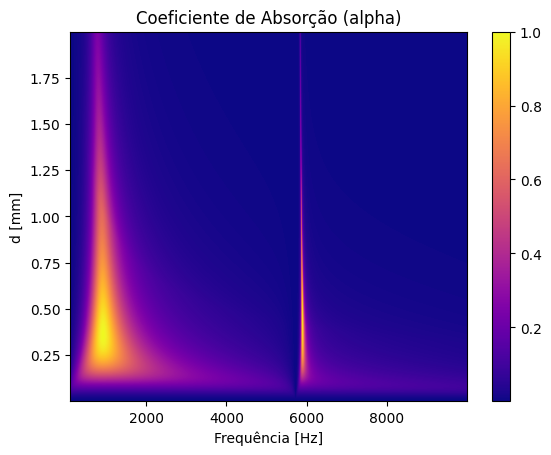

In [ ]:
## Plotagem do Coeficiente de Absorção variando um parâmetro
plt.imshow(alpha_case1, extent=[omega.min(), omega.max(), d_disc.min()*1e3, d_disc.max()*1e3], origin='lower', cmap='plasma', aspect='auto', vmax=1)
plt.colorbar()
plt.title('Coeficiente de Absorção (alpha)')
plt.ylabel('d [mm]')
plt.xlabel('Frequência [Hz]')
plt.show()

## Parte (b) - Modelo Maa / 2º Caso: Variando Espessura do Painel

In [ ]:
## Propriedades do Painel
d = 0.6e-3 #Diâmetro do Furo
phi = 0.02 #Porosidade do Painel
## Propriedades da Cavidade
D = 3e-2 ##Espessura da Cavidade
## Propriedades do Fluido
eta = 1.84e-5 #Viscosidade Dinãmica do ar
rho_0 = 1.21 #Densidade do Fluido
c_0 = 343.6 #Velocidade do Som
Z_0 = rho_0*c_0 #Impedância do ar

In [ ]:
##Variação da Espessura
t_disc = np.arange(0.001e-3, 2.5e-3, 0.001e-3)
alpha_case2 = np.zeros((len(t_disc), len(omega)))
for i, t in enumerate(t_disc):
  Zp_var = calc_Zp(
      eta=eta,
      t=t,
      phi=phi,
      d=d,
      rho_0=rho_0,
      omega=omega,
      Z_0=Z_0,
      D=D,
      c_0=c_0
  )
  alpha_var = 1-(np.abs((Zp_var-Z_0)/(Zp_var+Z_0))**2)
  alpha_case2[i] = alpha_var

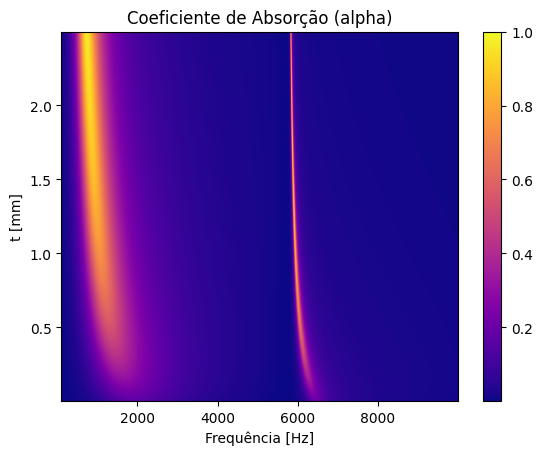

In [ ]:
## Plotagem do Coeficiente de Absorção variando um parâmetro
plt.imshow(alpha_case2, extent=[omega.min(), omega.max(), t_disc.min()*1e3, t_disc.max()*1e3], origin='lower', cmap='plasma', aspect='auto', vmax=1)
plt.colorbar()
plt.title('Coeficiente de Absorção (alpha)')
plt.ylabel('t [mm]')
plt.xlabel('Frequência [Hz]')
plt.show()

## Parte (b) - Modelo Maa / 3º Caso: Variando Porosidade

In [ ]:
## Propriedades do Painel
d = 0.6e-3 #Diâmetro do Furo
t = 1.5e-3 #Espessura do Painel
## Propriedades da Cavidade
D = 3e-2 ##Espessura da Cavidade
## Propriedades do Fluido
eta = 1.84e-5 #Viscosidade Dinãmica do ar
rho_0 = 1.21 #Densidade do Fluido
c_0 = 343.6 #Velocidade do Som
Z_0 = rho_0*c_0 #Impedância do ar

In [ ]:
##Variação da Porosidade
phi_disc = np.arange(1e-3, 10.1e-2, 1e-3)
alpha_case3 = np.zeros((len(phi_disc), len(omega)))
for i, phi in enumerate(phi_disc):
  Zp_var = calc_Zp(
      eta=eta,
      t=t,
      phi=phi,
      d=d,
      rho_0=rho_0,
      omega=omega,
      Z_0=Z_0,
      D=D,
      c_0=c_0
  )
  alpha_var = 1-(np.abs((Zp_var-Z_0)/(Zp_var+Z_0))**2)
  alpha_case3[i] = alpha_var

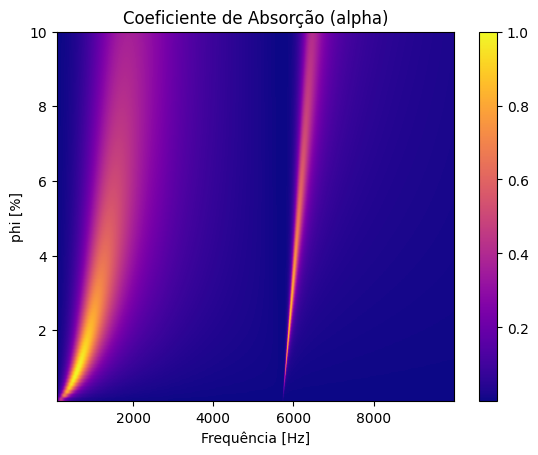

In [ ]:
## Plotagem do Coeficiente de Absorção variando um parâmetro
plt.imshow(alpha_case3, extent=[omega.min(), omega.max(), phi_disc.min()*1e2, phi_disc.max()*1e2], origin='lower', cmap='plasma', aspect='auto', vmax=1)
plt.colorbar()
plt.title('Coeficiente de Absorção (alpha)')
plt.ylabel('phi [%]')
plt.xlabel('Frequência [Hz]')
plt.show()

## Parte (b) - Modelo Maa / 4º Caso: Variando Espessura da Cavidade

In [ ]:
## Propriedades do Painel
d = 0.6e-3 #Diâmetro do Furo
t = 1.5e-3 #Espessura do Painel
phi = 0.02 #Porosidade do Painel
## Propriedades do Fluido
eta = 1.84e-5 #Viscosidade Dinãmica do ar
rho_0 = 1.21 #Densidade do Fluido
c_0 = 343.6 #Velocidade do Som
Z_0 = rho_0*c_0 #Impedância do ar

In [ ]:
##Variação da Espessura/Cavidade
D_disc = np.arange(0.1e-2, 20e-2, 1e-3)
alpha_case4 = np.zeros((len(D_disc), len(omega)))
for i, D in enumerate(D_disc):
  Zp_var = calc_Zp(
      eta=eta,
      t=t,
      phi=phi,
      d=d,
      rho_0=rho_0,
      omega=omega,
      Z_0=Z_0,
      D=D,
      c_0=c_0
  )
  alpha_var = 1-(np.abs((Zp_var-Z_0)/(Zp_var+Z_0))**2)
  alpha_case4[i] = alpha_var

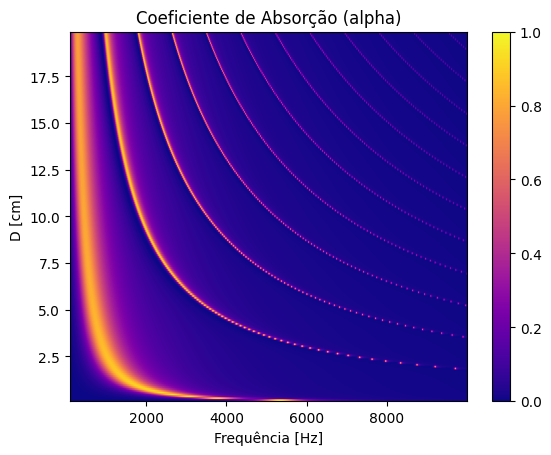

In [ ]:
## Plotagem do Coeficiente de Absorção variando um parâmetro
plt.imshow(alpha_case4, extent=[omega.min(), omega.max(),D_disc.min()*1e2, D_disc.max()*1e2], origin='lower', cmap='plasma', aspect='auto', vmax=1)
plt.colorbar()
plt.title('Coeficiente de Absorção (alpha)')
plt.ylabel('D [cm]')
plt.xlabel('Frequência [Hz]')
plt.show()